In [14]:
import numpy as np
from numpy import cos, sin, arccos


import matplotlib.pyplot as plt

In [19]:
data = np.arange(1890, 1900)
level = np.array([-147.5, -149.2, -146, -141.3, -151, -139.2, -146.8, -141.6, -132.2, -124.7])
sigma = np.array([20.7, 20.7, 20.7, 20.3, 21.6, 21.6, 21.2, 20.8, 19.7, 19.4])


f = open('data.txt', 'w')

for i in range(len(data)):
    s = str(data[i])+ " " + str(level[i]) + " " + str(sigma[i]) + '\n'
    f.write(s)

f.close()

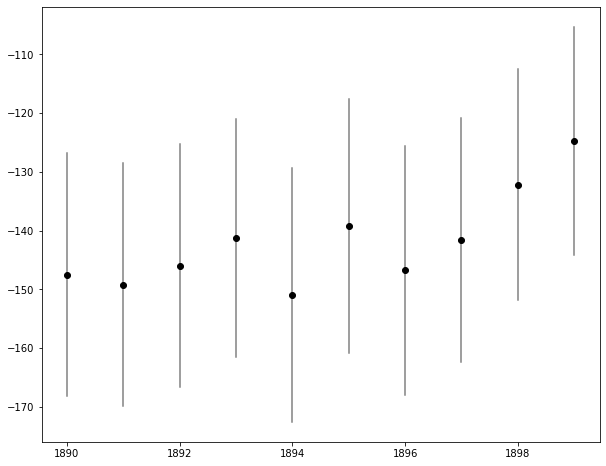

In [3]:
plt.figure(figsize=(10, 8))

plt.plot(data, level, "o", c = "k")

for i in range(10):
    plt.plot([data[i], data[i]], [level[i]-sigma[i],level[i]+sigma[i]], c = "k", alpha = 0.5)
    
plt.savefig("errors_bar.png")

In [4]:
y_mean = sum(level)/len(level)
print(y_mean)

-141.95


In [5]:
norm_sum = 0.0
All_sum = 0.0
for i in range(10):
    norm_sum = norm_sum + 1/sigma[i]/sigma[i]
    
for i in range(10):
    All_sum=All_sum+level[i]*1/sigma[i]/sigma[i]
All_sum=All_sum/norm_sum
print(All_sum)
    

-141.53591557601487


In [6]:
def mnk(x, y, m):
    #метод наименьших квадратов 
    b = np.zeros(m+1)
    G = np.zeros((m+1, m+1))
    for j in range(m+1):
        for i in range(len(x)):
            b[j]=b[j]+x[i]**j*y[i] #вектор правой части 
        
        for k in range(m+1):
            for i in range(len(x)):
                G[j][k]=G[j][k]+x[i]**(k+j) # матрица нормальной системы
        
    
    
    return np.linalg.solve(G, b) # получение коэффициентов многочлена 

def polinom_n(x, params ,m):
    #полином степени m
    result = 0.0
    for i in range(m+1):
        result = result+params[i]*x**i
        
    return result

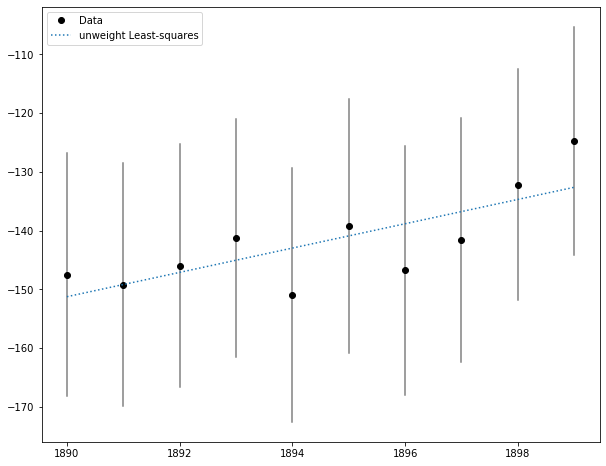

In [7]:

x_sq_sum = np.sum(np.square(data))
norm_coef = len(data)*x_sq_sum-np.sum(data)*np.sum(data)
c = (x_sq_sum*np.sum(level)-np.sum(data)*np.sum(data*level))/norm_coef 
m = (len(data)*np.sum(data*level) - np.sum(data)*np.sum(level))/norm_coef 

predictions_unweight = np.apply_along_axis(polinom_n,0, data, [c, m], 1)

alpha_cu = (np.sum(np.square(level-predictions_unweight))/(len(data)-2))**0.5

alpha_c=alpha_cu * np.sqrt((x_sq_sum/norm_coef) )
alpha_m =  alpha_cu * (len(data)/norm_coef)

plt.figure(figsize=(10, 8))

plt.plot(data, level, "o", c = "k", label = "Data")

for i in range(10):
    plt.plot([data[i], data[i]], [level[i]-sigma[i],level[i]+sigma[i]], c = "k", alpha = 0.5)
    
plt.plot(data, predictions_unweight, ":", label = "unweight Least-squares")

plt.legend(loc = "best")
plt.savefig("Unweight_lsm.png")

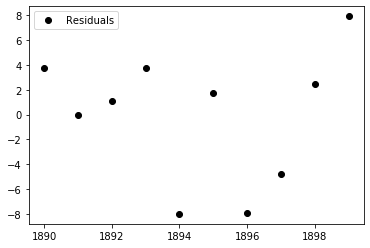

In [8]:
unweight_residuals = level - predictions_unweight

plt.plot(data, unweight_residuals, "o", c = "k", label = "Residuals")

plt.legend(loc = "best")
plt.savefig("res.png")

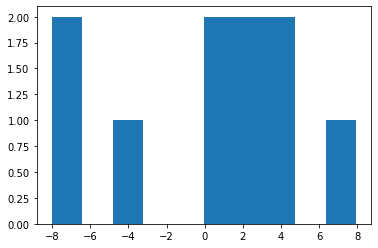

In [9]:
plt.hist(unweight_residuals)
plt.savefig("res1.png", nbin = 5)

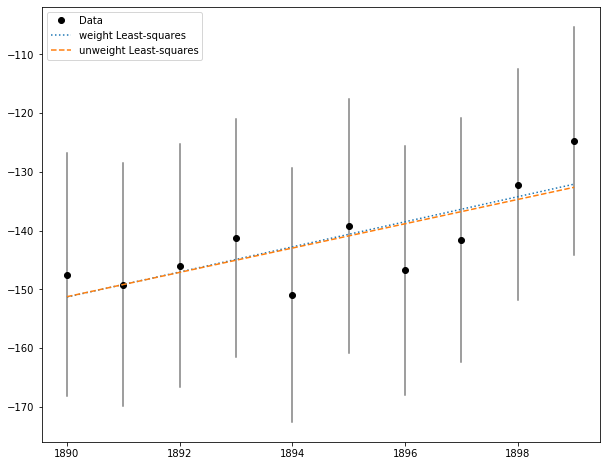

In [10]:

weights = 1/np.square(sigma)


norm_coef =np.sum(weights)*np.sum(weights*np.square(data))-(np.sum(weights*data))**2 
m_w = (np.sum(weights)*np.sum(weights*data*level) - np.sum(weights*data)*np.sum(weights*level))/norm_coef
c_w = (np.sum(weights*np.square(data))*np.sum(weights*level)- np.sum(weights*data)*np.sum(weights*data*level))/norm_coef

alpa_m_w = (np.sum(weights)/norm_coef)**0.5

alpa_c_w =  (np.sum(weights*np.square(data))/norm_coef)**0.5


predictions_weight = np.apply_along_axis(polinom_n,0, data, [c_w, m_w], 1)
plt.figure(figsize=(10, 8))

plt.plot(data, level, "o", c = "k", label = "Data")

for i in range(10):
    plt.plot([data[i], data[i]], [level[i]-sigma[i],level[i]+sigma[i]], c = "k", alpha = 0.5)
    
plt.plot(data, predictions_weight, ":", label = "weight Least-squares")
    
plt.plot(data, predictions_unweight, "--", label = "unweight Least-squares")

plt.legend(loc = "best")
plt.savefig("weight_lsm.png")

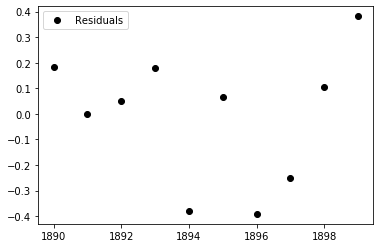

In [11]:
weight_residuals = (level - predictions_weight)/sigma

plt.plot(data, weight_residuals, "o", c = "k", label = "Residuals")

plt.legend(loc = "best")
plt.savefig("wres.png")


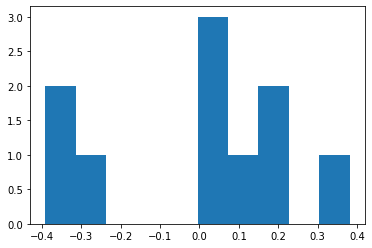

In [12]:
plt.hist(weight_residuals)
plt.savefig("wres1.png", nbin = 5)

In [13]:
chi =np.mean(np.square(weight_residuals) )
chi

0.059007063366366

In [14]:
m_w

2.135768945961778

In [15]:
c_w

-4187.927202418509

In [14]:
alpa_m_w

2.2270317779555886

In [15]:
alpa_c_w

4219.301332139508

In [18]:
 (np.sum(weights)/norm_coef)**0.5

2.2270317779555886

In [19]:
np.sum(weights)/norm_coef

4.959670540024031

In [18]:
R = 18300
alpha = 43.84*np.pi/180
beta = 19.51*np.pi/180


J = np.array([[-R*cos(beta)*sin(alpha),-R*cos(alpha)*sin(beta), cos(alpha)*cos(beta)], [R*cos(alpha)*cos(beta), -R*sin(alpha)*sin(beta),sin(alpha)*cos(beta)],[0, R*cos(beta), sin(beta)]  ])

In [19]:
J 

array([[-1.19476552e+04, -4.40821052e+03,  6.79863449e-01],
       [ 1.24415011e+04, -4.23323349e+03,  6.52877332e-01],
       [ 0.00000000e+00,  1.72492729e+04,  3.33971376e-01]])

In [20]:
e_alpha = 0.8

e_beta = 1.2

e_R = 2.0

errors = np.array([e_alpha, e_beta, e_R])

solution = np.dot(J, errors)
solution

array([-14846.617038  ,   4874.62645033,  20699.79537594])

In [23]:
inv = np.array([3.9, 2.0, 4.5])

sol = np.dot(np.linalg.inv(J), inv)
3600* sol 

array([-2.62710728e-01,  5.58594355e-01,  1.96563359e+04])

In [16]:
alpha = 43.84*np.pi/180
beta = 19.51*np.pi/180
phi = 58.17
u=0
T = 234.04
z = arccos(sin(phi)*sin(beta)+cos(phi)*cos(beta)*cos(T+u-alpha))
T = 234.04
s = (sin(z)**2*0.25-0.02**2*(cos(phi)*cos(beta)*sin(T+u-alpha))**2)/(cos(phi)*cos(beta)*sin(T+u-alpha))**2
s

196.11449769884663

In [17]:
2*0.01**2/sin(z)/sin(z)

0.00021981927985897958